# Nearly free electron model in 1D


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from ipywidgets import interactive
a = math.pi #lattice constant -- defining this lattice constant, g = 2*pi/a = 2
ks = np.arange(-10.0, 10.1, 0.01)


## Starting point, the free electron model

 <font size= 3>

First of all, we are going to calculate the band structure diagrams for a one dimensional periodic solid when the periodic potential is 0, that is V= 0. This is, the free electron model. 

Below we define a function that gives us the energy of the free electron, which is proportional to $k^2$:

In [2]:
def fEfree(k):
    Efree = (k)**2 #ignore constant factors
    return(Efree)

 <font size= 3> We can plot the energy of the free electron in the extended zone:

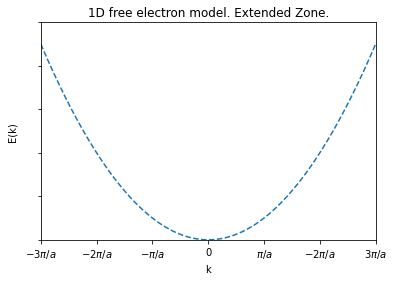

In [3]:
plt.plot(ks, fEfree(ks), linestyle= 'dashed')
x =[-3,-2,-1,0,1,2,3]
labels1 =['$-3\pi/a$','$-2\pi/a$','$-\pi/a$', '0','$\pi/a$', '$-2\pi/a$','$3\pi/a$']
plt.xticks(x, labels1)
plt.xlim((-3, 3))
plt.ylim((0, 10))
plt.yticks(color='w')
plt.xlabel("k")
plt.ylabel("E(k)")
plt.title('1D free electron model. Extended Zone.')
plt.show()

 <font size= 3>

Alternatively we can plot it in the repeated scheme by adding the energies with $k = k + G$ and $k = k-G$, and so on, being:

$G = 2\pi/a$:

In [4]:
g= 2*math.pi/a

 <font size= 3> Remeber that $a$ is the lattice constant. Now we can create the plot in the repeated scheme:

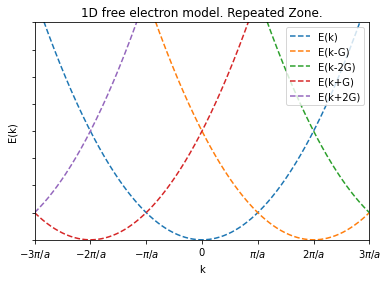

In [5]:
plt.plot(ks, fEfree(ks), linestyle= 'dashed', label = 'E(k)')
plt.plot(ks, fEfree(ks-g), linestyle= 'dashed', label = 'E(k-G)')
plt.plot(ks, fEfree(ks-2*g), linestyle= 'dashed',label = 'E(k-2G)')
plt.plot(ks, fEfree(ks+g), linestyle= 'dashed',label = 'E(k+G)' )
plt.plot(ks, fEfree(ks+2*g), linestyle= 'dashed',label = 'E(k+2G)')
labels1 =['$-3\pi/a$','$-2\pi/a$','$-\pi/a$', '0','$\pi/a$', '$2\pi/a$','$3\pi/a$']
plt.xticks(x, labels1)
plt.xlim((-3, 3))
plt.ylim((0, 8))
plt.yticks(color='w')
plt.xlabel("k")
plt.ylabel("E(k)")
plt.title('1D free electron model. Repeated Zone.')
plt.legend(loc='best')
plt.show()

 <font size= 3> Remember that we can condense all this in just the 1BZ, so we could have just plotted the graph between $-\pi/a$ and $\pi/a$. Reduced zone scheme.

## The nearly free electron model

 <font size= 3>

We are going to assume a weak periodic potential V. Solving for the energy states will requiere the application of perturbation theory. 

At first order, perturbation theory give us an energy shift V$_0$, which, since it is constant, we can consider equal to 0.

At second order, we get:

$E(k) = E_0(k) + \sum_{k'}^{}\frac{|<k'|V|k>|^2}{E_0(k) -E_0({k'})}$

Where $E_0$ is the energy from the free electron case. Since V is small, so will be the terms $|<k'|V|k>|^2$. Consequently $E(k) \approx E_0(k)$.

Note that there are points where $E_0(k) = E_0(k')$. This occurs (see the graph above) when $k = n\pi/a$ with $n$ and integer. When this happens, our calculation does not make sense!! 

To treat this problem, we need to apply degenerate perturbation theory. By doing so, we obtain that, close to $k = \pi/a$ (but also $-\pi/a$, $2\pi/a$ and in general when $n\pi/a$):

$E(k) = \frac{E_0(k) +E_0(k + G)}{2}\pm\sqrt{\frac{[E_0(k) -E_0(k + G)]^2}{4} + |V_G|^2}$ 

Where $V_G$ is the Fourier coefficient of $V$.

Note that when $E_0(k) = E_0(k + G)$, there are two energies for at the same k point, separated by a value $2|V_G|$. 

When we are far from the condition $E_0(k) = E_0(k + G)$, the energy is basically the one of the free electron model. 


Lets plot the results from the preturbation theory between $0$ and $2\pi/a$. First we define some functions:

 <font size= 3> The solution $E(k) = \frac{E_0(k) +E_0(k + G)}{2} + \sqrt{\frac{[E_0(k) -E_0(k + G)]^2}{2} + |V_G|^2}$ 

In [9]:
def fEplus(k,vg):
    Eplus = (fEfree(k)+fEfree(k+g))/2 + (0.25*(fEfree(k)-fEfree(k+g))**2+ vg**2)**0.5
    return(Eplus)

 <font size= 3> The solution $E (k) = \frac{E_0(k) +E_0(k + G)}{2} - \sqrt{\frac{[E_0(k) -E_0(k + G)]^2}{2} + |V_G|^2}$ 

In [10]:
def fEminus(k,vg):
    Eminus = (fEfree(k)+fEfree(k+g))/2 - (0.25*(fEfree(k)-fEfree(k+g))**2+ vg**2)**0.5
    return(Eminus)

 <font size= 3> Plot the solutions and compare them to the free-electron model. Use the slider to increase the potential or to make it = 0 and recover the result from the free electron model.

In [11]:
def f_1(Vg):
    plt.plot(ks, fEplus(-ks,Vg),color= 'red', label= ' nearly free (solution +)')
    plt.plot(ks, fEminus(-ks,Vg),color= 'blue', label= 'nearly free (solution -)')
    #we plot also the free electron model for comparison
    plt.plot(ks, fEfree(ks),color= 'black', linestyle= 'dashed', label= 'free electron model')
    plt.plot(ks, fEfree(ks-g),color= 'black', linestyle= 'dashed', label= '')
    x =[-3,-2,-1,0,1,2,3]
    labels1 =['$-3\pi/a$','$-2\pi/a$','$-\pi/a$', '0','$\pi/a$', '$2\pi/a$','$3\pi/a$']
    plt.xticks(x, labels1)
    plt.xlim((0, 2))
    plt.ylim((0, 5))
    plt.yticks(color='w')
    plt.xlabel("k")
    plt.ylabel("E(k)")
    plt.legend(loc='best')
    plt.show()
    
interactive_plot = interactive(f_1, Vg=(0.0,0.3, 0.01))
output = interactive_plot.children[-1]
output.layout.height = '275px'
interactive_plot

interactive(children=(FloatSlider(value=0.15, description='Vg', max=0.3, step=0.01), Output(layout=Layout(heig…

### Consequences:

<font size= 3>

    
    
* Band gaps open whenever $E(k)$ crosses. This occurs at the zone boundaries. The magnitude of the band gap is $2|Vg|$.



* Far from this crossings, the bands are very similar to those of the free electron model.